kaggle:https://www.kaggle.com/datasets/anjusunilkumar/air-quality-prediction?resource=download


Problem Statement: Air Quality Prediction

Air pollution poses severe risks to health and the environment. Predicting air quality is challenging due to factors like weather, traffic, and emissions. The goal is to develop a model to predict Air Quality Index (AQI) or pollutant levels (e.g., PM2.5, NO2) using historical and environmental data, enabling timely actions to protect public health and the environment.


Objective:

The primary objective of this project is to utilize the air quality dataset to develop a robust and reliable predictive model capable of forecasting air quality indices (AQI) and pollutant concentrations (e.g., PM2.5, PM10, NO2, CO). This involves analyzing historical air quality data to uncover patterns and trends, identifying key factors such as weather conditions, traffic emissions, industrial activity, and seasonal variations that contribute to air pollution. The project also aims to evaluate the model's performance using suitable metrics and refine it for improved accuracy.

The ultimate goal is to provide actionable insights for policymakers, urban planners, and individuals by offering timely predictions that help mitigate the adverse effects of air pollution on human health and the environment. This can support initiatives such as early warnings during high-risk pollution periods, better urban planning, and individual precautionary measures, contributing to sustainable development and enhanced public health outcomes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('/content/city_day.csv')
df=pd.DataFrame(data)

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
print("Number of columns:",df.shape[1])
print('Number of rows:',df.shape[0])

Number of columns: 16
Number of rows: 29531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022
Benzene,5623


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.drop('Xylene',axis=1,inplace=True) # High Null Values

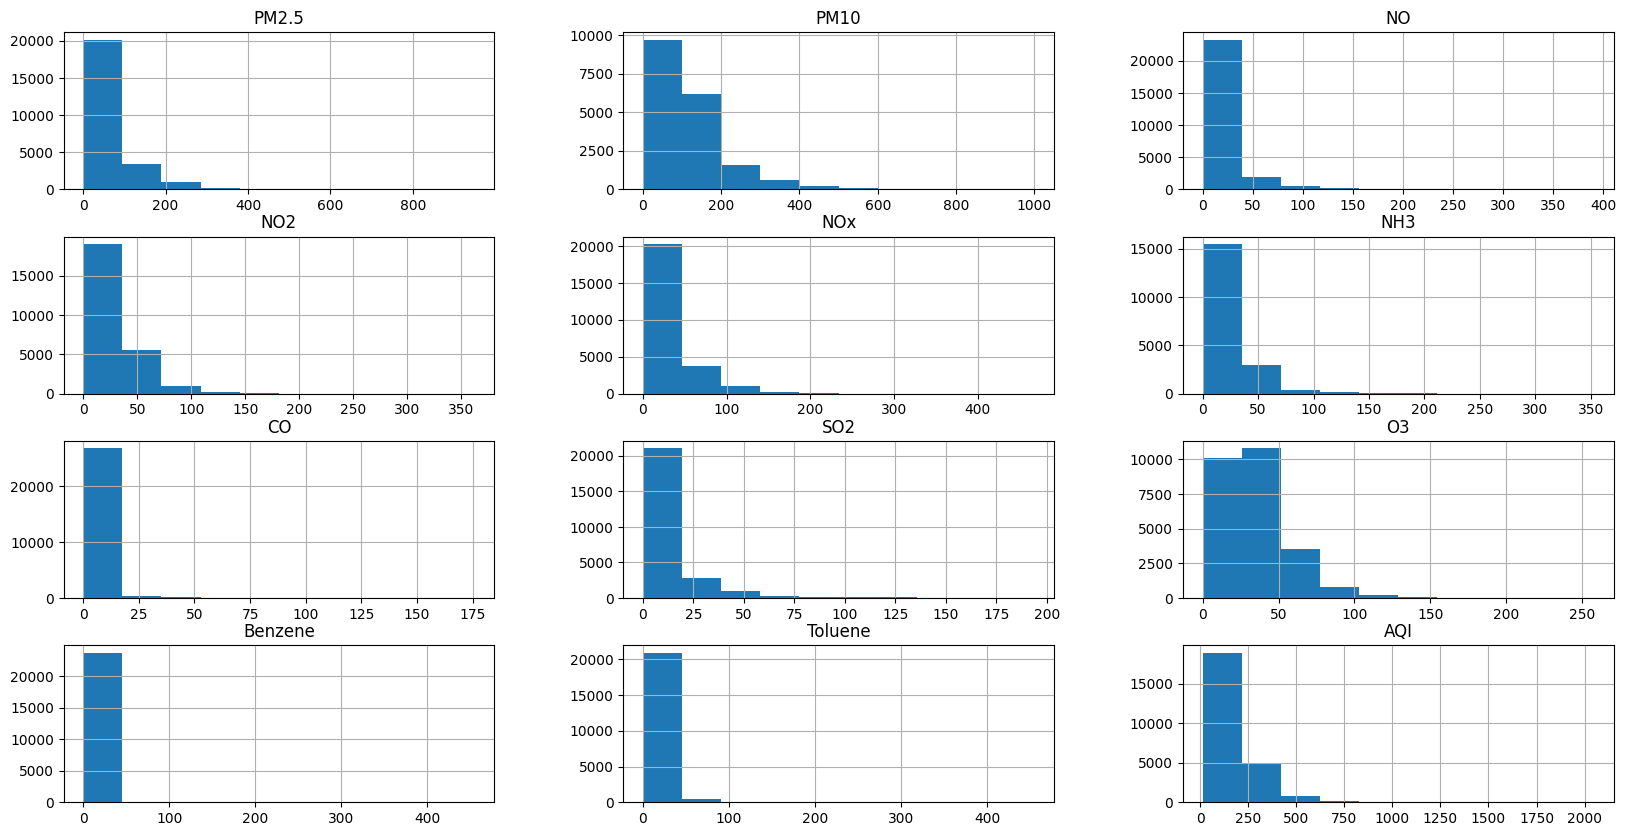

In [ ]:
df.hist(figsize=(20,10),bins=10)
plt.show()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Year']=df['Date'].dt.year

In [ ]:
df['Day']=df['Date'].dt.day

In [ ]:
df['Month']=df['Date'].dt.month

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.drop('AQI_Bucket',axis=1,inplace=True)

In [ ]:
x=df['PM2.5'].median()
df['PM2.5'].fillna(x,inplace=True)

<ipython-input-313-fcab7a6f74c2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(x,inplace=True)


In [ ]:
x=df['PM10'].median()
df['PM10'].fillna(x,inplace=True)
x=df['NO'].median()
df['NO'].fillna(x,inplace=True)
x=df['NO2'].median()
df['NO2'].fillna(x,inplace=True)
x=df['NOx'].median()
df['NOx'].fillna(x,inplace=True)
x=df['NH3'].median()
df['NH3'].fillna(x,inplace=True)
x=df['SO2'].median()
df['SO2'].fillna(x,inplace=True)
x=df['O3'].median()
df['O3'].fillna(x,inplace=True)
x=df['AQI'].median()
df['AQI'].fillna(x,inplace=True)
x=df['CO'].median()
df['CO'].fillna(x,inplace=True)
x=df['Benzene'].median()
df['Benzene'].fillna(x,inplace=True)
x=df['Toluene'].median()
df['Toluene'].fillna(x,inplace=True)

<ipython-input-314-213de36b9e87>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10'].fillna(x,inplace=True)
<ipython-input-314-213de36b9e87>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [ ]:
df.isnull().sum()


,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [ ]:
df['City']=LabelEncoder().fit_transform(df['City'])

<Axes: >

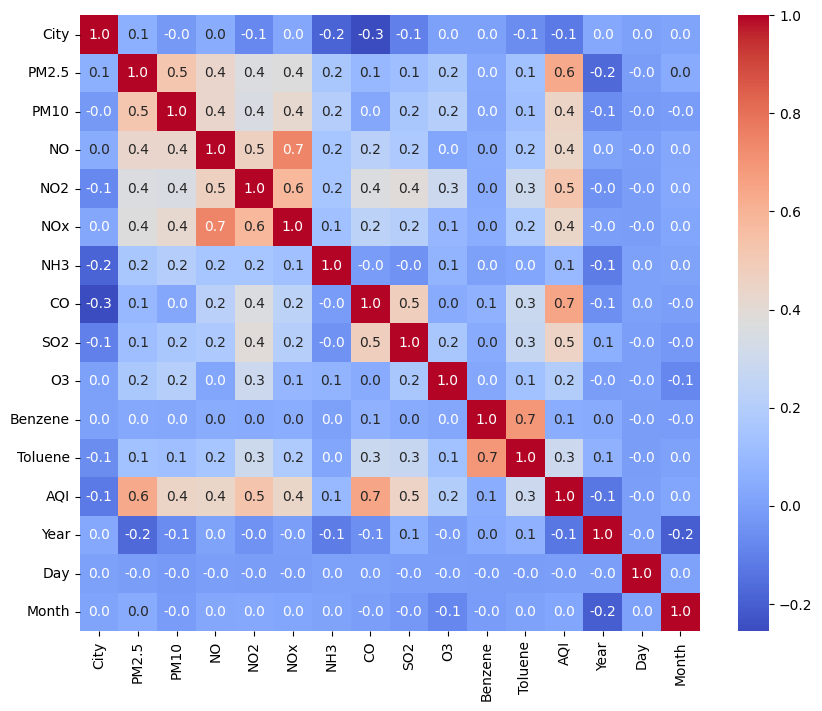

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, fmt='0.01f', cmap='coolwarm')

In [ ]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


In [ ]:
df.drop('NO',axis=1,inplace=True)
# df.drop('NO2',axis=1,inplace=True)
df.drop('Toluene',axis=1,inplace=True)
df.drop('O3',axis=1,inplace=True)
df.drop('NH3',axis=1,inplace=True)
df.drop('Benzene',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)
df.drop('Day',axis=1,inplace=True)
df.drop('City',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)

<Figure size 3000x800 with 0 Axes>

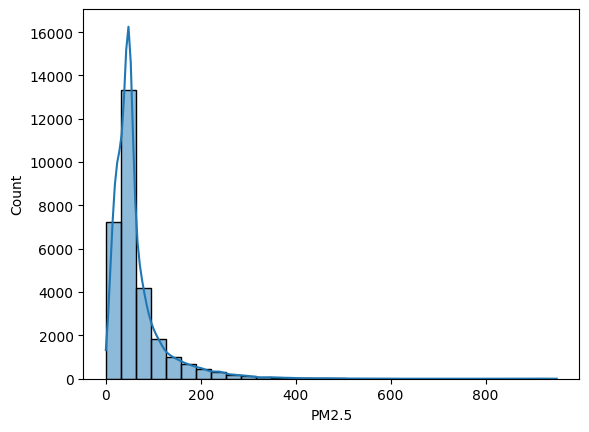

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['PM2.5'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['PM2.5'] = np.log1p(df['PM2.5'])

<Figure size 3000x800 with 0 Axes>

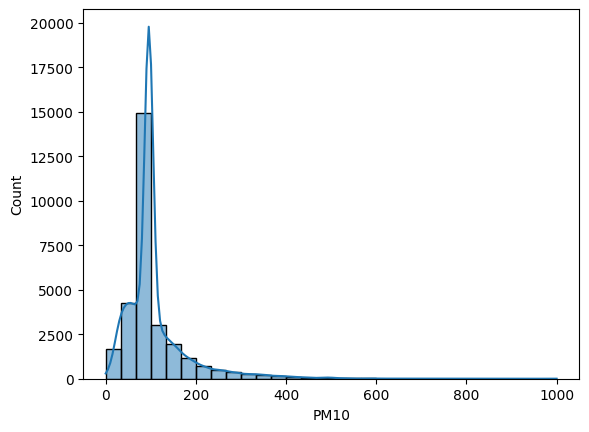

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['PM10'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['PM10'] = np.log1p(df['PM10'])

<Figure size 3000x800 with 0 Axes>

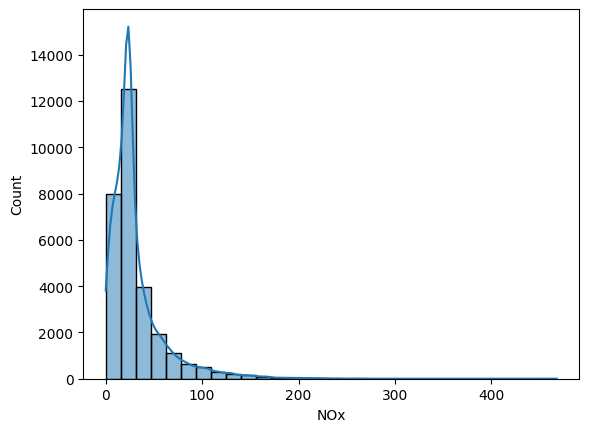

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['NOx'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['NOx'] = np.log1p(df['NOx'])

<Figure size 3000x800 with 0 Axes>

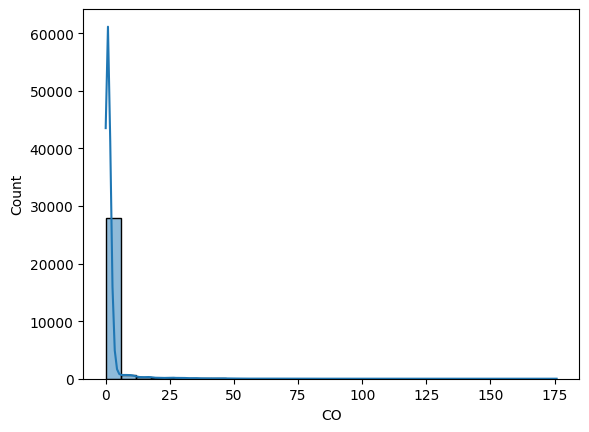

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['CO'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['CO'] = np.log1p(df['CO'])

<Figure size 3000x800 with 0 Axes>

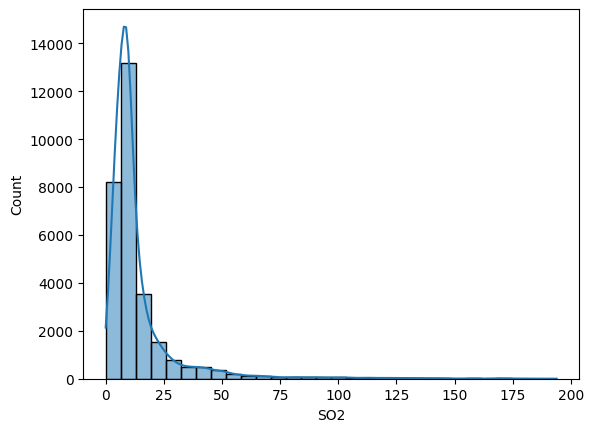

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['SO2'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['SO2'] = np.log1p(df['SO2'])

<Figure size 3000x800 with 0 Axes>

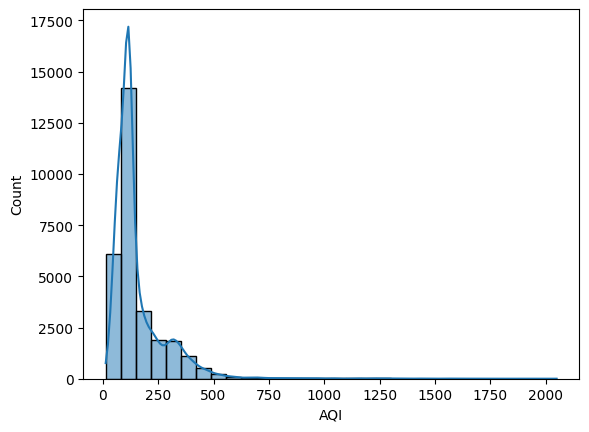

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['AQI'],bins=30, kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

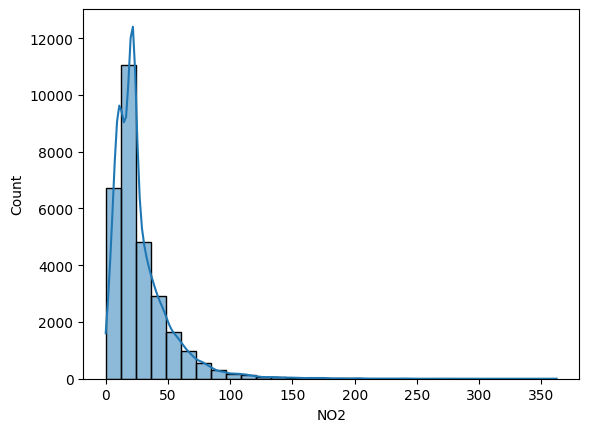

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['NO2'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['NO2'] = np.log1p(df['NO2'])

<Axes: >

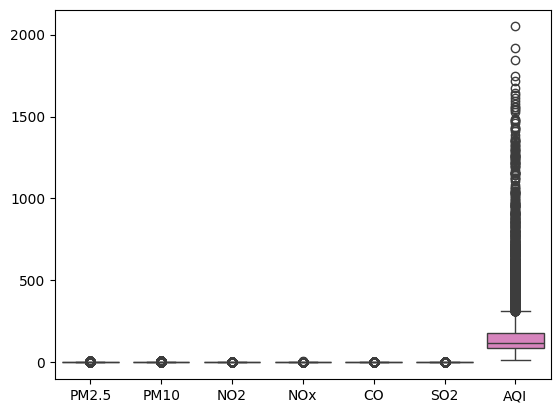

In [ ]:
sns.boxplot(df)

In [ ]:
df['AQI'] = np.log1p(df['AQI'])

In [ ]:

def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df= remove_outliers_iqr(df, exclude_column='AQI')


In [ ]:
X=df[['PM2.5','PM10','NOx','CO','SO2','NO2']]
y=df['AQI']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([4.71637294, 4.71203083, 5.09061608, ..., 4.42484476, 5.08727231,
       4.78366032])

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.04703827182596462
R-squared Score: 0.7166934440770693
